Here we will show what the cystic fibrosis simulation looks like across time

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import seaborn as sns
from benchmark_mae.evaluate import edge_roc_curve
from benchmark_mae.sim import cystic_fibrosis_simulation

from itertools import product
from skbio.stats.composition import clr, centralize
from skbio.stats.composition import clr_inv as softmax
from scipy.sparse import coo_matrix
from scipy.stats import rankdata
import matplotlib.colors as colors
import glob
import yaml

from scipy.stats import spearmanr, pearsonr
%matplotlib inline

In [2]:
df = cystic_fibrosis_simulation(data_dir="../../data/cf_sim")

In [3]:
df[['P','I','SA','SG','F']] = df[['P','I','SA','SG','F']] * 1e6
df[['theta_f', 'theta_p']] = df[['theta_f', 'theta_p']] * 1e3
df['microbial_total'] = df[['theta_f', 'theta_p']].sum(axis=1)
df['metabolite_total'] = df[['F', 'P', 'I', 'SA', 'SG']].sum(axis=1)
df['metabolite_total'] = df[['F', 'P', 'I', 'SA', 'SG']].sum(axis=1)
df['evil_total'] = df.metabolite_total * (df.time+1)

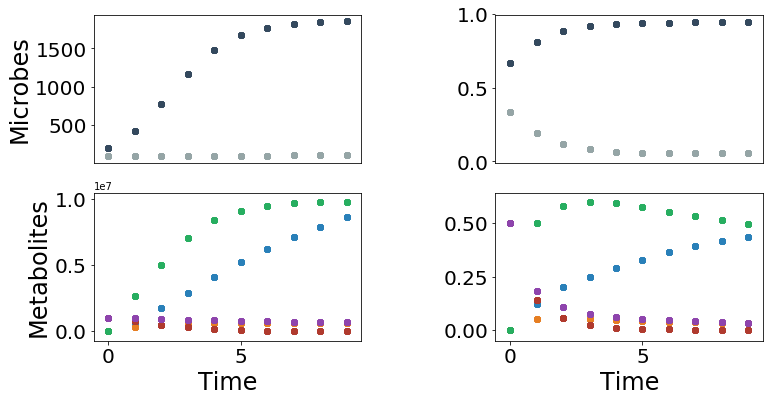

In [4]:
labelsize = 20
fontsize = 24
microbe_names = ['theta_f', 'theta_p']
metabolite_names = ['F', 'I', 'P', 'SA', 'SG']

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
metadata = df.loc[np.logical_and(df['y']==20, df['time'] < 10)]
mode = 'time'


type_colors = {'SA': '#B03A2E',
               'F': '#2980B9',
               'P': '#27AE60',
               'SG': '#8E44AD',
               'I': '#E67E22'
              }

microbe_colors = {
    'theta_f': '#95A5A6',
    'theta_p': '#34495E'
}
for m in microbe_names:
    axes[0][0].scatter(
        metadata[mode], metadata[m], label=m,
        color=microbe_colors[m]        
    )
#axes[0][0].legend(prop={'size': labelsize}, loc=4)
axes[0][0].set_xticks([])
axes[0][0].xaxis.set_tick_params(labelsize=labelsize)
axes[0][0].yaxis.set_tick_params(labelsize=labelsize)
axes[0][0].set_ylabel('Microbes', fontsize=fontsize)

microbe_legend = {}
for m in microbe_names:
    microbe_legend[m] = axes[0][1].scatter(
        metadata[mode], metadata[m] / metadata.microbial_total, label=m,
        color=microbe_colors[m]
    )
axes[0][1].set_xticks([])
axes[0][1].xaxis.set_tick_params(labelsize=labelsize)
axes[0][1].yaxis.set_tick_params(labelsize=labelsize)


for k in metabolite_names:
    axes[1][0].scatter(
        metadata[mode], metadata[k], label=k,
        color=type_colors[k])        
#axes[1][0].legend(prop={'size': labelsize}, loc=4)

axes[1][0].xaxis.set_tick_params(labelsize=labelsize)
axes[1][0].yaxis.set_tick_params(labelsize=labelsize)
axes[1][0].set_xlabel('Time', fontsize=fontsize)
axes[1][0].set_ylabel('Metabolites', fontsize=fontsize)

metabolite_legend = {}
for k in metabolite_names:
    metabolite_legend[k] = axes[1][1].scatter(
        metadata[mode], metadata[k] / metadata.metabolite_total, label=k,
        color=type_colors[k])
axes[1][1].xaxis.set_tick_params(labelsize=labelsize)
axes[1][1].yaxis.set_tick_params(labelsize=labelsize)
axes[1][1].set_xlabel('Time', fontsize=fontsize)


fig.subplots_adjust(wspace=0.5)

plt.savefig('../../figures/figure3/simple_sim.png')

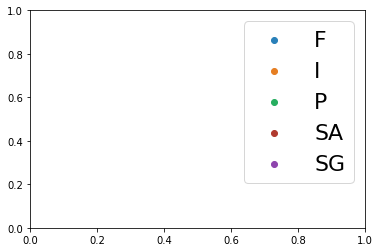

In [5]:
plt.legend(list(metabolite_legend.values()), metabolite_legend.keys(), fontsize=22)
plt.savefig('../../figures/figure3/metabolite_legend.png')

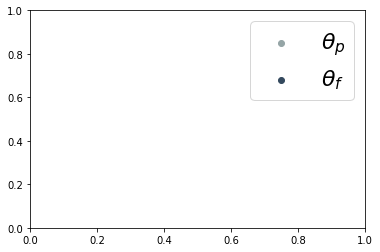

In [6]:
plt.legend(list(microbe_legend.values()), [r'$\theta_p$', r'$\theta_f$'], fontsize=22)
plt.savefig('../../figures/figure3/microbe_legend.png')